# Machine Learning November Minor Project
## create a classification model to predict whether price range of mobile based on certain specification

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("MOBILE.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

### TARGET VARIABLE

In [5]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# 1) REMOVE HANDLE NULL VALUES(IF ANY)


In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### HANDLING DUPLICATES

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

### CHECKING DATATYPES

In [10]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

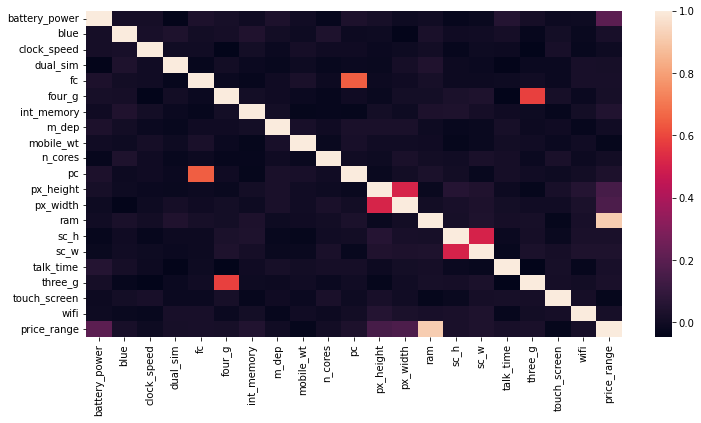

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

### selecting dependent(x) and independent(y) variables

In [12]:
x=df.drop('price_range',axis=1)
y=df['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


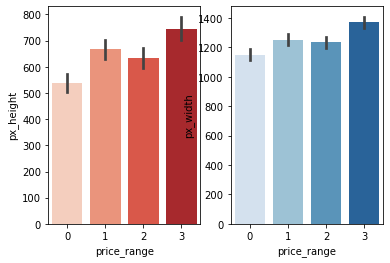

In [13]:
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df , palette = 'Blues')
plt.show()

x=df.drop('price_range',axis=1)
y=df['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
#x-tarin , y_train

# #2) spliting data into training and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
print(2000*0.25)

500.0


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(1500, 20)
(500, 20)
(1500,)
(500,)


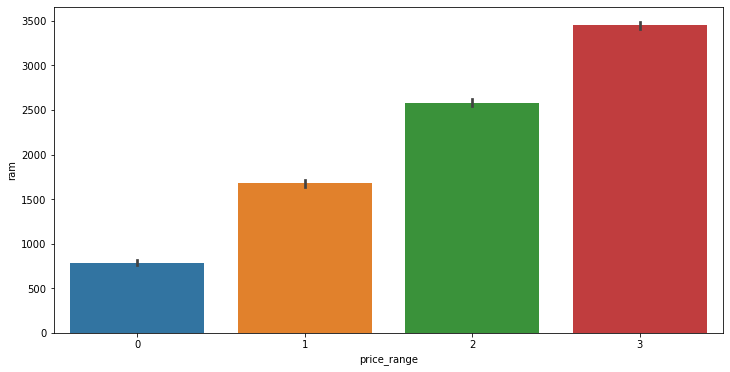

In [17]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'ram',data=df)
plt.show()

C:\Users\Manupriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


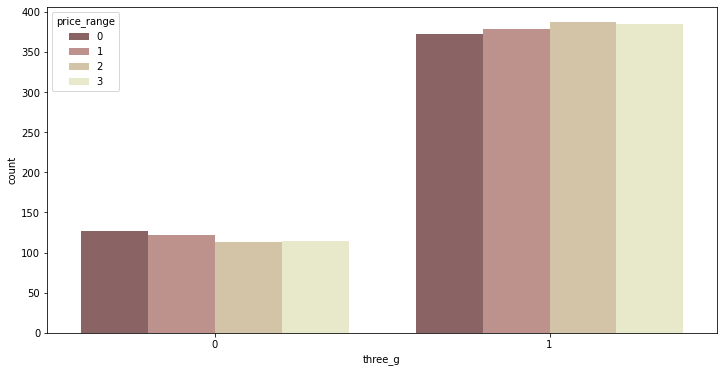

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(df['three_g'] , hue = df['price_range'] , palette = 'pink')
plt.show()

### CONFUSION MATRIX

In [19]:
from sklearn.metrics import confusion_matrix,classification_report


In [20]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
def nscore(model):
    print('training score', model.score(x_train,y_train))
    print('testing score',model.score(x_test,y_test))

C:\Users\Manupriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


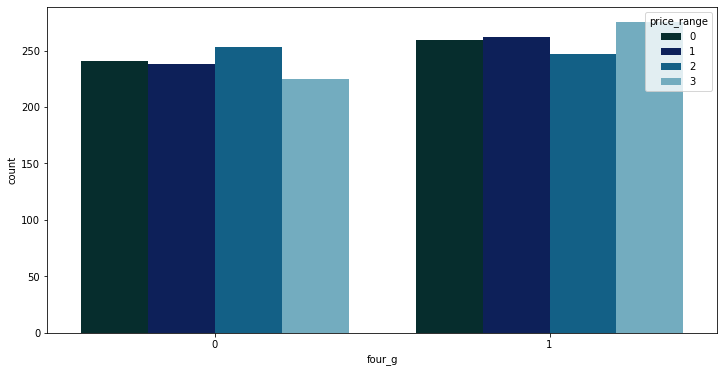

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(df['four_g'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

# #3 Apply the following models on the training dataset and generate the predicted value for the test dataset

# (a) LOGISTIC REGRESSION



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.linear_model import LogisticRegression  

In [24]:
 #applying linear regression
m1=LogisticRegression(max_iter=10000,solver="liblinear")
m1.fit(x_train,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [25]:
#Accuracy
print('train score',m1.score(x_train,y_train))
print('train score',m1.score(x_test,y_test))

train score 0.7946666666666666
train score 0.782


In [26]:
nscore(m1)

training score 0.7946666666666666
testing score 0.782


In [27]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

[0 2 0 3 1 2 2 0 3 1 0 1 1 3 3 2 3 3 1 0 0 1 2 2 0 2 3 3 2 0 0 0 3 0 2 1 2
 0 3 0 2 3 3 0 2 3 1 1 3 1 3 1 0 0 1 2 2 3 0 0 1 3 3 2 1 0 3 3 2 2 2 1 0 1
 3 0 1 3 1 1 3 1 2 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 2 1 0
 0 3 1 3 2 3 3 0 2 1 3 3 2 3 3 0 3 0 2 3 0 1 3 0 3 1 0 0 2 3 1 3 3 0 0 0 2
 2 2 3 1 1 0 2 3 0 1 0 1 2 3 3 1 1 0 0 2 2 3 3 0 0 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 2 0 1 2 1 3 3 3 1 2 0 0 0 1 1 1 3 1 1 2 1 1 3 1
 3 0 0 2 0 3 0 0 1 0 1 3 2 1 1 2 3 0 2 3 2 3 0 3 1 3 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 3 2 3 0 2 3 2 3 2 0 0 2 0 3 3 1 3 2 0 3 1 2 0 0 3 0 1 2 3 3 3 0
 1 0 0 3 3 0 1 2 2 0 3 3 2 3 1 3 3 0 2 1 2 2 0 0 0 3 3 3 1 0 1 0 2 3 2 0 2
 3 2 1 3 0 0 3 1 3 1 0 1 1 2 1 2 3 1 0 1 2 3 0 3 0 0 1 0 2 2 2 2 3 0 3 2 3
 3 3 3 3 1 2 0 3 2 3 3 0 2 3 1 3 3 3 1 0 2 3 0 0 2 3 2 1 2 2 1 3 0 3 1 3 0
 0 1 0 1 0 2 0 2 3 3 1 2 1 3 1 1 3 1 0 0 3 0 2 0 0 2 3 3 0 2 0 1 2 3 3 0 3
 0 2 0 0 3 3 0 2 1 2 3 2 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 3 2 0 1 2 3 2 1 0 0
 0 2 3 1 0 2 3 1 3 1 2 2 

In [28]:
ypred_m1=m1.predict(x_test)
eval_model(y_test,ypred_m1)

[[124   7   1   0]
 [ 13  72  33   0]
 [  0  25  69  26]
 [  0   0   4 126]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       132
           1       0.69      0.61      0.65       118
           2       0.64      0.57      0.61       120
           3       0.83      0.97      0.89       130

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.78      0.77       500



In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[124   7   1   0]
 [ 13  72  33   0]
 [  0  25  69  26]
 [  0   0   4 126]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       132
           1       0.69      0.61      0.65       118
           2       0.64      0.57      0.61       120
           3       0.83      0.97      0.89       130

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.78      0.77       500



In [31]:
print('train score',m1.score(x_test,y_test))

train score 0.782


# (b)KNN classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
m2=KNeighborsClassifier(n_neighbors=11)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [34]:
#Accuracy
print('train score',m2.score(x_train,y_train))
print('train score',m2.score(x_test,y_test))

train score 0.952
train score 0.938


In [35]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 3 2 2 1 3 1 3 1 0 0 0 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 3 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 0 2 2 

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(confusion_matrix(y_test,ypred_m2))
print(classification_report(y_test,ypred_m2))

[[127   5   0   0]
 [  4 113   1   0]
 [  0  11 106   3]
 [  0   0   7 123]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       132
           1       0.88      0.96      0.91       118
           2       0.93      0.88      0.91       120
           3       0.98      0.95      0.96       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [38]:
print('train score',m2.score(x_test,y_test))

train score 0.938


# (c) SVM classifier with linear and rbf kernal


In [39]:
from sklearn.svm import SVC

In [40]:
m3=SVC(kernel='linear')


In [41]:
m3.fit(x_train,y_train)

SVC(kernel='linear')

In [42]:
nscore(m3)

training score 0.992
testing score 0.97


In [43]:
#Accuracy
print('train score',m3.score(x_train,y_train))
print('train score',m3.score(x_test,y_test))

train score 0.992
train score 0.97


In [44]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 3 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 0 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 0 2 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 0 1 3 1 2 0 2 2 

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
print(confusion_matrix(y_test,ypred_m3))
print(classification_report(y_test,ypred_m3))

[[127   5   0   0]
 [  1 117   0   0]
 [  0   3 112   5]
 [  0   0   1 129]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       132
           1       0.94      0.99      0.96       118
           2       0.99      0.93      0.96       120
           3       0.96      0.99      0.98       130

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [47]:
print('train score',m3.score(x_test,y_test))

train score 0.97


# (d)Decision Tree Classifier



In [69]:
#(d)Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


In [70]:
m4 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
m4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [71]:
nscore(m4)

training score 0.8793333333333333
testing score 0.826


In [72]:
ypred_m4=m4.predict(x_test)
eval_model(y_test,ypred_m4)

[[121  11   0   0]
 [ 11  97  10   0]
 [  0  19  82  19]
 [  0   0  17 113]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       132
           1       0.76      0.82      0.79       118
           2       0.75      0.68      0.72       120
           3       0.86      0.87      0.86       130

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



In [73]:
#Accuracy
print('train score',m4.score(x_train,y_train))
print('train score',m4.score(x_test,y_test))

train score 0.8793333333333333
train score 0.826


In [74]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

[0 1 1 3 1 1 2 0 2 1 0 1 2 3 2 2 3 3 1 0 0 2 1 2 0 1 2 2 2 0 0 0 3 0 1 1 3
 0 3 0 1 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 2 0 0 0 3 3 1 0 0 3 3 1 2 1 2 0 1
 3 0 1 3 2 1 3 2 1 0 2 3 2 3 3 0 2 3 1 1 3 2 2 3 1 1 0 0 0 0 0 3 2 0 1 1 0
 0 2 1 2 2 2 3 0 2 1 3 1 1 3 3 0 3 0 2 3 0 2 2 0 2 1 0 0 2 3 1 3 3 0 0 0 1
 2 3 3 2 0 0 2 2 0 2 0 1 2 3 2 3 1 0 0 2 2 3 3 1 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 2 2 0 0 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 1 1 3 0 0 1 0 2 3 2 1 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 3 1 3 0 1 3 2 2 2 1 0 1 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 2 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 2 0 1 0 2 3 3 1 2
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 1 3 3 3 0 0 2 3 0 0 2 3 1 1 1 2 2 3 1 3 2 2 0
 1 1 0 1 0 1 0 2 2 3 2 1 1 3 1 1 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 0 3
 1 2 0 0 3 3 0 1 2 2 3 1 2 0 1 3 1 0 3 2 0 0 3 2 3 2 0 3 1 0 1 2 3 2 1 0 0
 1 2 1 1 1 1 3 1 2 0 3 3 

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
print(confusion_matrix(y_test,ypred_m4))
print(classification_report(y_test,ypred_m4))

[[121  11   0   0]
 [ 11  97  10   0]
 [  0  19  82  19]
 [  0   0  17 113]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       132
           1       0.76      0.82      0.79       118
           2       0.75      0.68      0.72       120
           3       0.86      0.87      0.86       130

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



In [77]:
print('train score',m4.score(x_test,y_test))

train score 0.826


In [78]:
fn = x_train.columns
cn = ['0','1']
print(fn)
print(cn)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
['0', '1']


In [86]:
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: 'LogisticRegression' object has no attribute 'tree_'

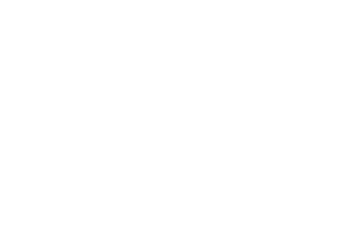

In [89]:
plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

# (e)Random forest Classifier



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
m5=RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=7)
m5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=80)

In [60]:
nscore(m5)

training score 0.9826666666666667
testing score 0.864


In [61]:
ypred_m5=m5.predict(x_test)
eval_model(y_test,ypred_m5)

[[121  11   0   0]
 [  9  98  11   0]
 [  0  15  93  12]
 [  0   0  10 120]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       132
           1       0.79      0.83      0.81       118
           2       0.82      0.78      0.79       120
           3       0.91      0.92      0.92       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [62]:
#Accuracy
print('train score',m5.score(x_train,y_train))
print('train score',m5.score(x_test,y_test))

train score 0.9826666666666667
train score 0.864


In [63]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

[0 2 1 3 1 2 2 0 3 1 0 0 2 3 3 2 3 3 1 0 0 1 1 1 0 1 2 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 3 0 3 3 2 1 3 1 3 1 0 0 1 1 1 3 0 0 0 3 3 1 0 0 3 3 1 2 2 3 0 1
 3 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 1 2 3 0 2 2 0 2 1 0 0 2 3 0 2 3 0 0 0 1
 2 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 2 1 1 2 2 3 2 3 1 2 0 0 0 1 1 1 3 1 0 2 2 1 3 1
 3 0 0 2 1 3 0 0 1 0 1 3 2 0 1 2 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 1 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 1 3 3 3 1 0 1 0 2 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 1 1 3 1 0 0 3 3 0 3 0 0 2 0 0 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 2 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 1 1 1 2 1 2 0 3 1 2 0
 0 1 0 1 0 2 1 1 3 3 2 1 1 3 1 0 3 1 0 1 3 0 1 1 0 1 3 3 0 2 1 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 0 3 3 

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
print(confusion_matrix(y_test,ypred_m5))
print(classification_report(y_test,ypred_m5))

[[121  11   0   0]
 [  9  98  11   0]
 [  0  15  93  12]
 [  0   0  10 120]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       132
           1       0.79      0.83      0.81       118
           2       0.82      0.78      0.79       120
           3       0.91      0.92      0.92       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [66]:
print('train score',m5.score(x_test,y_test))

train score 0.864
